In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
print(movies.columns)
print(credits.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


##### Merging dataframes

In [5]:
# merge dataframes on movie_id
# replace movie_id column as id in credits df or make a new one
credits['id'] = credits['movie_id']
df_merged = movies.merge(credits, on='id')
# check for anamoly
remove_redundant = df_merged[df_merged['id']!=df_merged['movie_id']].shape[0] == 0 and df_merged[df_merged['title_x']!=df_merged['title_y']].shape[0] == 0
# remove movie_id, title_x
df_merged.drop(['movie_id','title_x'], axis = 1, inplace=True) if remove_redundant else None
# rename title_y to title
df_merged.rename(columns = {'title_y':'title'}, inplace = True)
df_merged.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
cs       2
ta       2
ro       2
ar       2
id       2
te       1
tr       1
pl       1
no       1
vi       1
ky       1
ps       1
nb       1
el       1
af       1
hu       1
xx       1
is       1
sl       1
Name: original_language, dtype: int64


<AxesSubplot:>

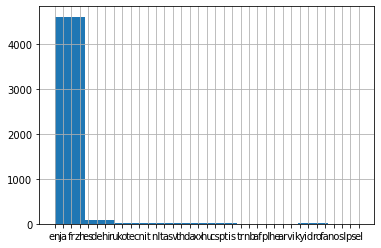

In [6]:
print(df_merged['original_language'].value_counts())
df_merged['original_language'].hist()

##### Selecting necessary columns
###### Will create tags for Content based recommendation system, so there is a need for only those columns which help in creating tags
-   budget
-   __genre__
-   homepage
-   __id__
-   __keywords__
-   original_language (the distribution is heavily biased towards EN)
-   original_title
-   __overview__
-   popularity (no need since content has nothing to do with popularity)
-   __production_companies__
-   production_countries
-   __release_date__ (older generation may like older movies)
-   revenue
-   runtime
-   spoken_languages
-   status
-   tagline (tagline may sometimes not be a proper description, we have overview anyways)
-   __title__
-   vote_average
-   vote_count
-   __cast__
-   __crew__

In [7]:
df_movies = df_merged[['id', 'title', 'genres', 'keywords', 'overview', 'production_companies', 'release_date', 'cast', 'crew']]
print(df_movies.columns)
print(df_movies.info())
print(df_movies.describe())

Index(['id', 'title', 'genres', 'keywords', 'overview', 'production_companies',
       'release_date', 'cast', 'crew'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    4803 non-null   int64 
 1   title                 4803 non-null   object
 2   genres                4803 non-null   object
 3   keywords              4803 non-null   object
 4   overview              4800 non-null   object
 5   production_companies  4803 non-null   object
 6   release_date          4802 non-null   object
 7   cast                  4803 non-null   object
 8   crew                  4803 non-null   object
dtypes: int64(1), object(8)
memory usage: 375.2+ KB
None
                  id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.00000

##### Tags column : overview, genre, keywords, cast, crew
###### Final df will have id, title and tags

##### Preprocessing

In [8]:
df_movies.isnull().sum()

id                      0
title                   0
genres                  0
keywords                0
overview                3
production_companies    0
release_date            1
cast                    0
crew                    0
dtype: int64

In [9]:
print('Null overview:', df_movies[df_movies['overview'].isnull()]['title'], '*'*5, sep='\n')
print('Null release date:', df_movies[df_movies['release_date'].isnull()]['title'], '*'*5, sep='\n')

df_movies['overview'].fillna('', inplace=True)
df_movies['release_date'].fillna('', inplace=True)

df_movies.isnull().sum()

Null overview:
2656    Chiamatemi Francesco - Il Papa della gente
4140                   To Be Frank, Sinatra at 100
4431                                   Food Chains
Name: title, dtype: object
*****
Null release date:
4553    America Is Still the Place
Name: title, dtype: object
*****


C:\Users\ankujayu\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


id                      0
title                   0
genres                  0
keywords                0
overview                0
production_companies    0
release_date            0
cast                    0
crew                    0
dtype: int64

In [10]:
# show duplicated rows
df_movies.duplicated().sum()

0

In [11]:
print(df_movies['genres'][0])
print(df_movies['keywords'][0])
print(df_movies['overview'][0])
print(df_movies['cast'][0])
print(df_movies['crew'][0])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]
In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between followin

###### Function to convert genres, crew, cast, keyword, overview, production_companies to a valid format 

In [12]:
# for selecting relevant words from overview
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def format_text(string):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(string)
    for word in word_tokens:
        word = word.lower()
        if word not in stop_words and word.isalpha():
            filtered.append(word)
    return filtered

# words_filtered = format_text(df_movies['overview'][0])
# print("Actual word count: ", len(df_movies['overview'][0].split()), "Num of filtered words: ", len(words_filtered))



In [13]:
def convert_to_format(string, key=None, topk=-1, specific_dict_key=None, specific_dict_value=None):
    required_values_list = list()

    try:
        evaluated = eval(string)
        if isinstance(evaluated, list):
            # for picking specific job from crew
            if not specific_dict_key is None and not specific_dict_value is None:
                for item in evaluated:
                    if isinstance(item, dict):
                        try:
                            # check if specific_dict_key is a key in item dict
                            if specific_dict_key in item and specific_dict_value.lower() == item[specific_dict_key].lower():
                                # NOTE: we are required to remove any spaces
                                # required_values_list.append(item[key].lower())
                                required_values_list.append(re.sub(r"[ ]+", "", item[key].lower()))
                        except KeyError as e:
                            print('Key {} not found.'.format(key))
                            break
                        except:
                            print('Unknown Exception.')    
            else:
                # traverse each dict and extract value for its key
                for item in evaluated:
                    if isinstance(item, dict):
                        try:
                            # required_values_list.append(item[key].lower())
                            required_values_list.append(re.sub(r"[ ]+", "", item[key].lower()))
                        except KeyError as e:
                            print('Key {} not found.'.format(key))
                            break
                        except:
                            print('Unknown Exception.')
        else:
            print('Passed object: {} not supported!'.format(string))    
    except:
        if isinstance(string, str) and key is None:
            required_values_list = format_text(string)
    
    if topk == -1:
        return required_values_list 
    else:   
        return required_values_list[:topk] 


In [14]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: convert_to_format(x, 'name'))
df_movies['keywords'] = df_movies['keywords'].apply(lambda x: convert_to_format(x, 'name'))

df_movies.head()

<ipython-input-14-0ea274796d18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['genres'] = df_movies['genres'].apply(lambda x: convert_to_format(x, 'name'))
<ipython-input-14-0ea274796d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['keywords'] = df_movies['keywords'].apply(lambda x: convert_to_format(x, 'name'))


,id,title,genres,keywords,overview,production_companies,release_date,cast,crew
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
# picking only top 3 cast
df_movies['cast'] = df_movies['cast'].apply(lambda x: convert_to_format(x, 'name', 3))
df_movies.head()

<ipython-input-15-6c58122b25f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['cast'] = df_movies['cast'].apply(lambda x: convert_to_format(x, 'name', 3))


,id,title,genres,keywords,overview,production_companies,release_date,cast,crew
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,"[samworthington, zoesaldana, sigourneyweaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,"[johnnydepp, orlandobloom, keiraknightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,"[danielcraig, christophwaltz, léaseydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,"[christianbale, michaelcaine, garyoldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,"[taylorkitsch, lynncollins, samanthamorton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
df_movies['crew'] = df_movies['crew'].apply(lambda x: convert_to_format(x, 'name', specific_dict_key='job', specific_dict_value='director'))

<ipython-input-16-762ccef61bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['crew'] = df_movies['crew'].apply(lambda x: convert_to_format(x, 'name', specific_dict_key='job', specific_dict_value='director'))


In [17]:
df_movies.head(-5)

,id,title,genres,keywords,overview,production_companies,release_date,cast,crew
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron]
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,"[johnnydepp, orlandobloom, keiraknightley]",[goreverbinski]
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,"[danielcraig, christophwaltz, léaseydoux]",[sammendes]
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,"[christianbale, michaelcaine, garyoldman]",[christophernolan]
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,"[taylorkitsch, lynncollins, samanthamorton]",[andrewstanton]
...,...,...,...,...,...,...,...,...,...
4793,182291,On The Downlow,[drama],"[confession, hazing, gangmember, latino, lgbt,...",Isaac and Angel are two young Latinos involved...,"[{""name"": ""Iconoclast Films"", ""id"": 26677}]",2004-04-11,"[tonysancho, michaelcortez, donatocruz]",[tadeogarcia]
4794,286939,Sanctuary: Quite a Conundrum,"[thriller, horror, comedy]",[],"It should have been just a normal day of sex, ...","[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...",2012-01-20,"[sasharamos, erincline, emilyrogers]",[thomasl.phillips]
4795,124606,Bang,[drama],"[gang, audition, policefake, homeless, actress]",A young woman in L.A. is having a bad day: she...,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",1995-09-09,"[darlingnarita, petergreene, michaelnewland]",[ashbaron-cohen]
4796,14337,Primer,"[sciencefiction, drama, thriller]","[distrust, garage, identitycrisis, timetravel,...",Friends/fledgling entrepreneurs invent a devic...,"[{""name"": ""Thinkfilm"", ""id"": 446}]",2004-10-08,"[shanecarruth, davidsullivan, caseygooden]",[shanecarruth]


In [18]:
df_movies['production_companies'] = df_movies['production_companies'].apply(lambda x: convert_to_format(x, 'name'))

<ipython-input-18-3abab4ad2441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['production_companies'] = df_movies['production_companies'].apply(lambda x: convert_to_format(x, 'name'))


In [19]:
df_movies['overview'] = df_movies['overview'].apply(lambda x: convert_to_format(x))

<ipython-input-19-3d6167579e37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['overview'] = df_movies['overview'].apply(lambda x: convert_to_format(x))


In [20]:
df_movies.head()

,id,title,genres,keywords,overview,production_companies,release_date,cast,crew
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[century, paraplegic, marine, dispatched, moon...","[ingeniousfilmpartners, twentiethcenturyfoxfil...",2009-12-10,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron]
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[captain, barbossa, long, believed, dead, come...","[waltdisneypictures, jerrybruckheimerfilms, se...",2007-05-19,"[johnnydepp, orlandobloom, keiraknightley]",[goreverbinski]
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[cryptic, message, bond, past, sends, trail, u...","[columbiapictures, danjaq, b24]",2015-10-26,"[danielcraig, christophwaltz, léaseydoux]",[sammendes]
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...","[following, death, district, attorney, harvey,...","[legendarypictures, warnerbros., dcentertainme...",2012-07-16,"[christianbale, michaelcaine, garyoldman]",[christophernolan]
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","[john, carter, former, military, captain, inex...",[waltdisneypictures],2012-03-07,"[taylorkitsch, lynncollins, samanthamorton]",[andrewstanton]


In [21]:
# new column to hold tags
df_movies['tags'] = df_movies['genres'] + df_movies['keywords'] + df_movies['overview'] + df_movies['production_companies'] + df_movies['cast'] + df_movies['crew']
df_movies_tags = df_movies[['id', 'title', 'release_date', 'tags']]
df_movies_tags.head()

<ipython-input-21-205b2280c2dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['tags'] = df_movies['genres'] + df_movies['keywords'] + df_movies['overview'] + df_movies['production_companies'] + df_movies['cast'] + df_movies['crew']


,id,title,release_date,tags
0,19995,Avatar,2009-12-10,"[action, adventure, fantasy, sciencefiction, c..."
1,285,Pirates of the Caribbean: At World's End,2007-05-19,"[adventure, fantasy, action, ocean, drugabuse,..."
2,206647,Spectre,2015-10-26,"[action, adventure, crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,2012-07-16,"[action, crime, drama, thriller, dccomics, cri..."
4,49529,John Carter,2012-03-07,"[action, adventure, sciencefiction, basedonnov..."


###### Text Stemming

In [22]:
# Stemming --> the problem is kill, killed, killing .. are same !!!
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stem_text(word_list):
    stemmed_words_list = list()
    for word in word_list:
        stemmed_words_list.append(ps.stem(word))
    return " ".join(stemmed_words_list)

##### Using Text Vectorization (bag of words)

In [23]:
# we will select top k words by appearance each word represent a certain dimension and then check the occurence of each word in each movie tags column to count number of occurence for it giving out a vector for each 
# https://towardsdatascience.com/text-vectorization-bag-of-words-bow-441d1bfce897#:~:text=%20Text%20Vectorization%3A%20Bag%20of%20Words%20%28BoW%29%20,into%20finite%20length%20vectors.%20The%20boW...%20More%20
# vectorizer requires text, converting list to string

df_movies_tags['tags'] = df_movies_tags['tags'].apply(lambda x: stem_text(x))
df_movies_tags.head()

<ipython-input-23-096b3d604912>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_tags['tags'] = df_movies_tags['tags'].apply(lambda x: stem_text(x))


,id,title,release_date,tags
0,19995,Avatar,2009-12-10,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,2007-05-19,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,2015-10-26,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,2012-07-16,action crime drama thriller dccomic crimefight...
4,49529,John Carter,2012-03-07,action adventur sciencefict basedonnovel mar m...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000, stop_words='english')

In [25]:
vectors = cv.fit_transform(df_movies_tags['tags']).toarray()
print(vectors)
print(cv.get_feature_names())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['1960', '1970', '19thcenturi', '3d', '40acres', 'aaroneckhart', 'abandon', 'abduct', 'abil', 'abl', 'abus', 'academi', 'accept', 'accid', 'accident', 'accompani', 'account', 'accus', 'achiev', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'adam', 'adamsandl', 'adapt', 'addict', 'adolesc', 'adopt', 'adult', 'adulteri', 'adventur', 'advertis', 'advic', 'affair', 'affect', 'africa', 'aftercreditssting', 'afterlif', 'age', 'agenc', 'agent', 'ago', 'agre', 'ahead', 'aid', 'air', 'airplan', 'airport', 'alaska', 'alcohol', 'alconentertain', 'alecbaldwin', 'alex', 'alic', 'alien', 'alieninvas', 'aliv', 'alli', 'allow', 'alon', 'alpacino', 'alreadi', 'alter', 'altern', 'alway', 'amaz', 'ambit', 'ambiti', 'amblinentertain', 'ambush', 'america', 'american', 'americanfootbal', 'amnesia', 'amp', 'amulefilmwork', 'ancient', 'anderson', 'andi', 'android', 'angel', 'angeli

###### Calculating cosine similarity between all possible pair of vectors (for Higher dimensions euclidean distance is not a good option)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity.shape

(4803, 4803)

In [27]:
def recommend(movie_title, topk):
    df_movie = df_movies_tags[df_movies_tags['title'] == movie_title]
    if df_movie.shape[0] == 0:
        return None
    else:
        movie_index = df_movie.index[0]
        # sorted(list(enumerate(similarity[movie_index])), lambda x: x[1])
        topk_movie_similarities = sorted(list(enumerate(similarity[movie_index])), key = lambda x: x[1], reverse=True)[1:topk+1]
        return [df_movies_tags.iloc[item[0]]['title'] for item in topk_movie_similarities]

In [28]:
recommend('Life of Pi', 10)

['Sahara',
 'Deep Rising',
 'Arn: The Knight Templar',
 'Dragonball Evolution',
 'Virgin Territory',
 'Silver Medalist',
 'Two Brothers',
 "Pirates of the Caribbean: At World's End",
 'Eragon',
 'Crouching Tiger, Hidden Dragon']

In [32]:
import pickle
pickle.dump(df_movies_tags, open('movies.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
# df_movies_tags

In [ ]:
import pickle
pickle.dump(df_movies_tags, open('movies.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
